## K-Nearest Neighbours

In [1]:
# Import essential libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame, Series
import seaborn as sb

# Import K-Nearest Neighbors libraries
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

In [2]:
# Import CPI data for comparison
cpi_data_clean = pd.read_csv('cleaned_cpi.csv')

### Create function to run K-Nearest Neighbors algorithm

In [3]:
def knn_algorithm(pred_data_clean,cpi_data_clean, neighbor, xaxis):

    # Merge predictor and CPI datasets to find values within a common time period
    pred_cpi = pd.merge(pred_data_clean, cpi_data_clean, how='inner',on='Date')

    # Execute 80/20 train-test split 
    pred_train, pred_test, cpi_train, cpi_test = train_test_split(pred_cpi[['Value_x']],pred_cpi[['Value_y']],test_size=0.2)

    # Create regressor object
    pred_reg = KNeighborsRegressor(n_neighbors=neighbor)
    pred_reg.fit(pred_train,cpi_train)

    # Visualise prediction on train dataset 
    cpi_train_pred = pred_reg.predict(pred_train)

    f,axes = plt.subplots(1,1,figsize=(16,8))
    plt.scatter(pred_train, cpi_train, color='green')
    plt.scatter(pred_train, cpi_train_pred, color='red')
    plt.title("K-Nearest Neighbors on Train Set")
    plt.xlabel(str(xaxis))
    plt.ylabel("CPI Value")
    plt.show()

    # Visualise prediction on test dataset
    cpi_test_pred = pred_reg.predict(pred_test)

    f,axes = plt.subplots(1,1,figsize=(16,8))
    plt.scatter(pred_test, cpi_test, color='green')
    plt.scatter(pred_test, cpi_test_pred, color='red')
    plt.title("K-Nearest Neighbors on Test Set")
    plt.xlabel(str(xaxis))
    plt.ylabel("CPI Value")
    plt.show()

    # Explained variance values for train and test set
    print("Coefficient of Determination on train set: ", round(pred_reg.score(pred_train,cpi_train),3))
    print("Coefficient of Determination on test set: ", round(pred_reg.score(pred_test,cpi_test),3))

    return round(pred_reg.score(pred_test,cpi_test),3)





### Number of Neighbors


In [4]:
# Create a function to test the goodness of fit while varying K value
def knn_test(pred_data_clean,cpi_data_clean, neighbor):

    # Merge predictor and CPI datasets to find values within a common time period
    pred_cpi = pd.merge(pred_data_clean, cpi_data_clean, how='inner',on='Date')

    # Execute 80/20 train-test split 
    pred_train, pred_test, cpi_train, cpi_test = train_test_split(pred_cpi[['Value_x']],pred_cpi[['Value_y']],test_size=0.2)

    # Create regressor object
    pred_reg = KNeighborsRegressor(n_neighbors=neighbor)
    pred_reg.fit(pred_train,cpi_train)

    # Explained variance values for train and test set
    print("Coefficient of Determination on train set: ", round(pred_reg.score(pred_train,cpi_train),3))
    print("Coefficient of Determination on test set: ", round(pred_reg.score(pred_test,cpi_test),3))

    return round(pred_reg.score(pred_test,cpi_test),3)


In [5]:
# Test KNN model on NEER data to determine optimal K value

pred_data_clean = pd.read_csv('cleaned_neer.csv')

for k in range(1,10):
    print("Accuracy when K=",k)
    k_score = knn_test(pred_data_clean,cpi_data_clean, k)
    print()

Accuracy when K= 1
Coefficient of Determination on train set:  0.966
Coefficient of Determination on test set:  -0.487

Accuracy when K= 2
Coefficient of Determination on train set:  0.67
Coefficient of Determination on test set:  -0.215

Accuracy when K= 3
Coefficient of Determination on train set:  0.503
Coefficient of Determination on test set:  0.282

Accuracy when K= 4
Coefficient of Determination on train set:  0.5
Coefficient of Determination on test set:  0.285

Accuracy when K= 5
Coefficient of Determination on train set:  0.515
Coefficient of Determination on test set:  -0.013

Accuracy when K= 6
Coefficient of Determination on train set:  0.441
Coefficient of Determination on test set:  0.244

Accuracy when K= 7
Coefficient of Determination on train set:  0.446
Coefficient of Determination on test set:  0.161

Accuracy when K= 8
Coefficient of Determination on train set:  0.363
Coefficient of Determination on test set:  0.508

Accuracy when K= 9
Coefficient of Determination 

k = 5 is the best fit

### KNN Model on inflation expectations data

In [6]:
# Import predictor dataset
bie_data_clean = pd.read_csv('cleaned_bie.csv')

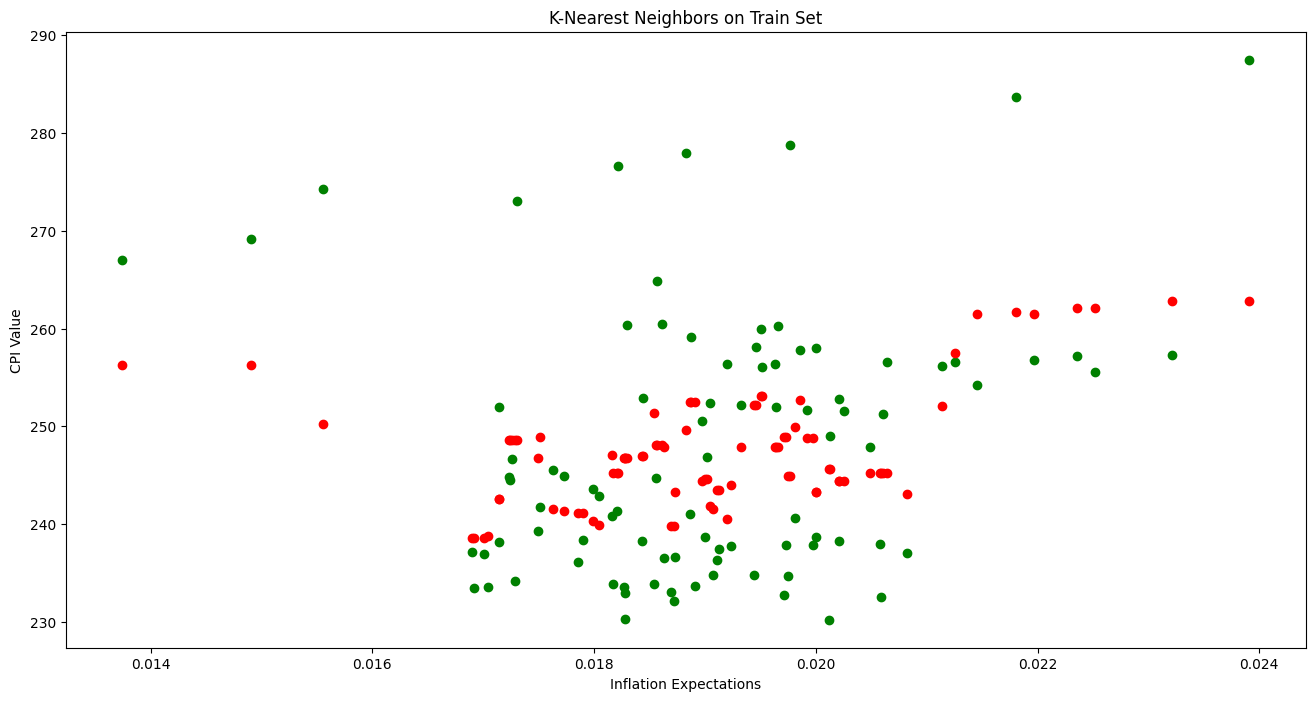

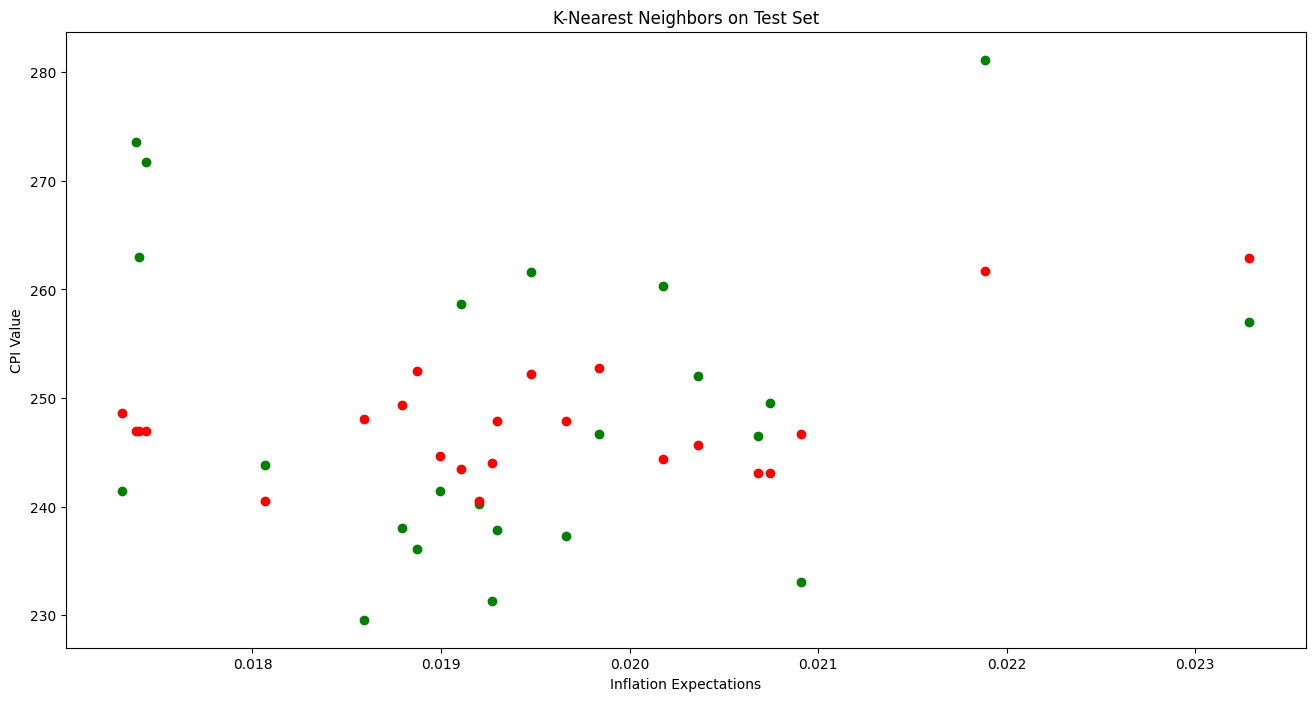

Coefficient of Determination on train set:  0.249
Coefficient of Determination on test set:  0.101


In [7]:
# Generate KNN model
bie_score = knn_algorithm(bie_data_clean,cpi_data_clean,5,"Inflation Expectations")

### KNN Model on unemployment rate data

In [8]:
# Import predictor dataset
unemp_data_clean = pd.read_csv('cleaned_unemp.csv')

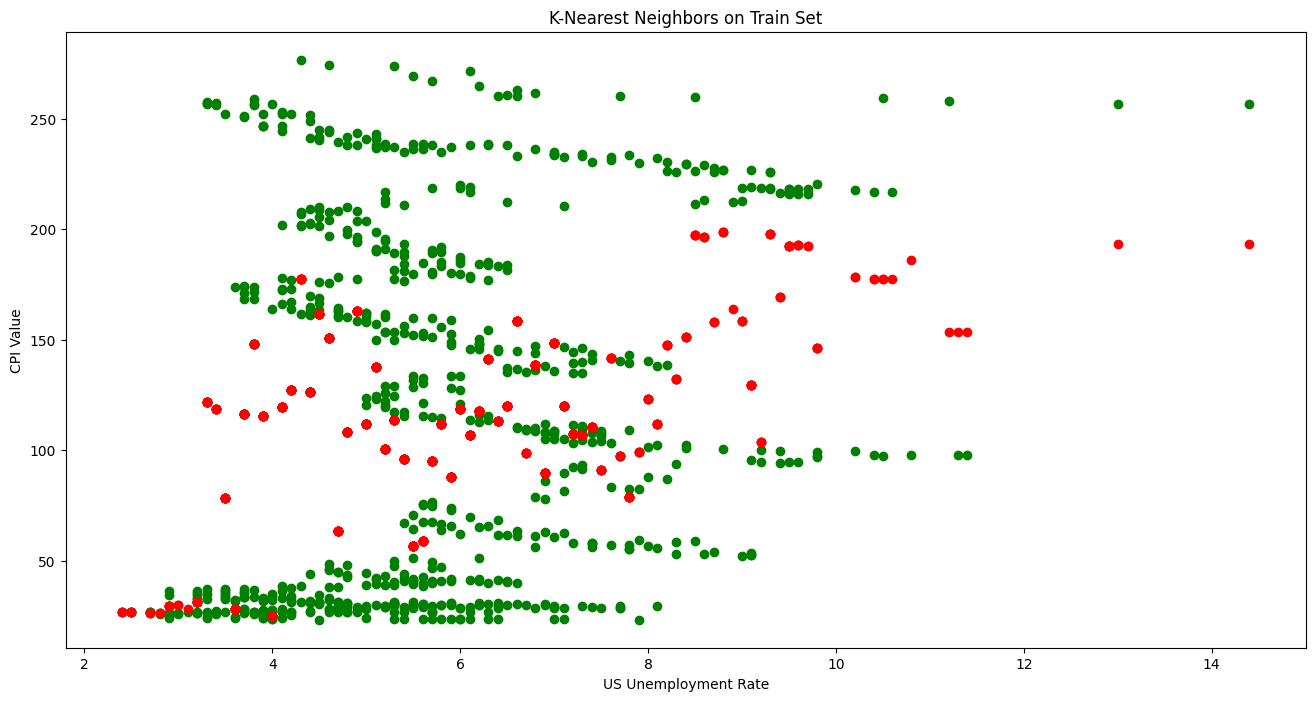

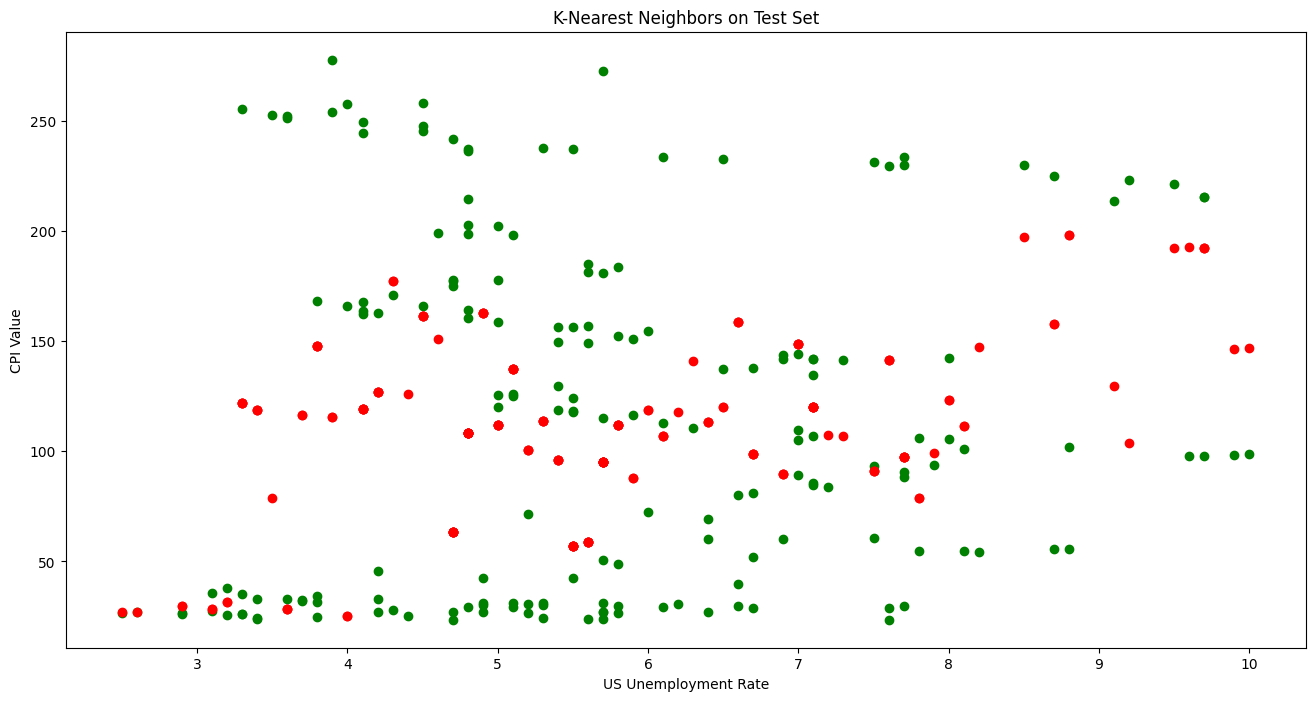

Coefficient of Determination on train set:  0.096
Coefficient of Determination on test set:  -0.229


In [9]:
# Generate KNN model
unemp_score = knn_algorithm(unemp_data_clean, cpi_data_clean, 5, "US Unemployment Rate")

### KNN Model on Bitcoin data

In [10]:
# Import predictor dataset
bitcoin_data_clean = pd.read_csv('cleaned_bitcoin.csv')

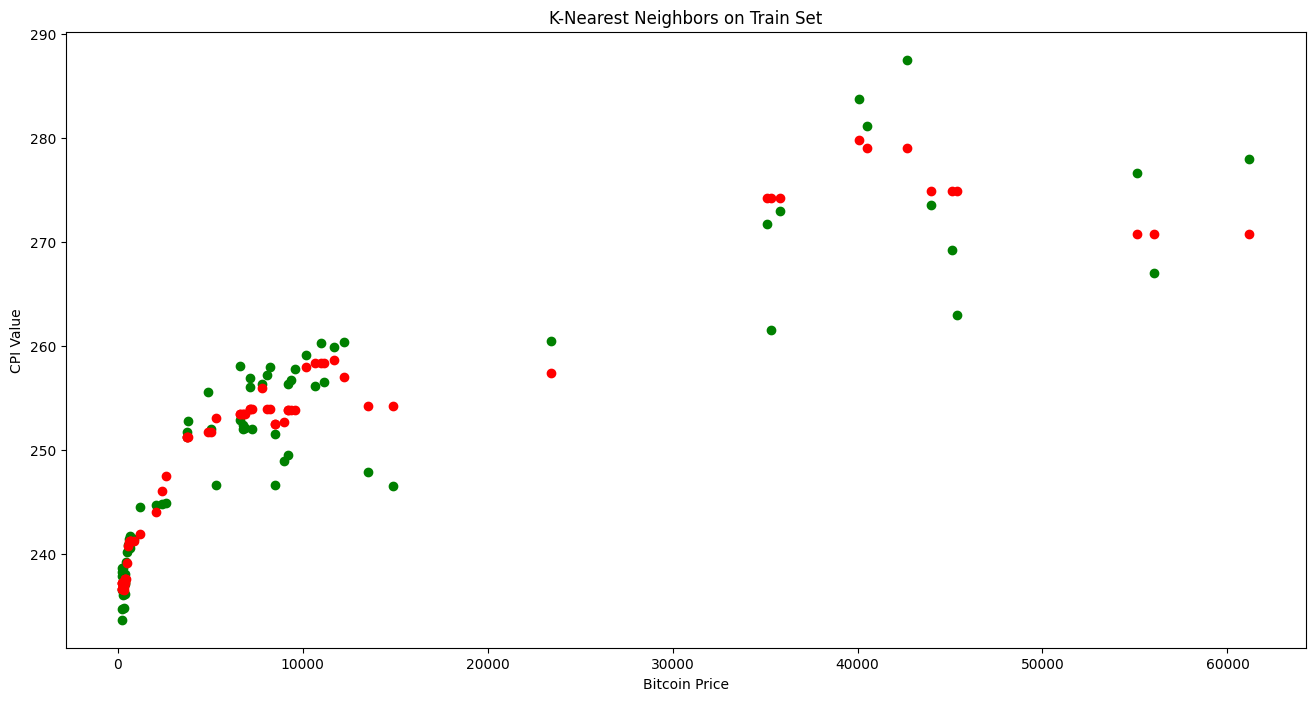

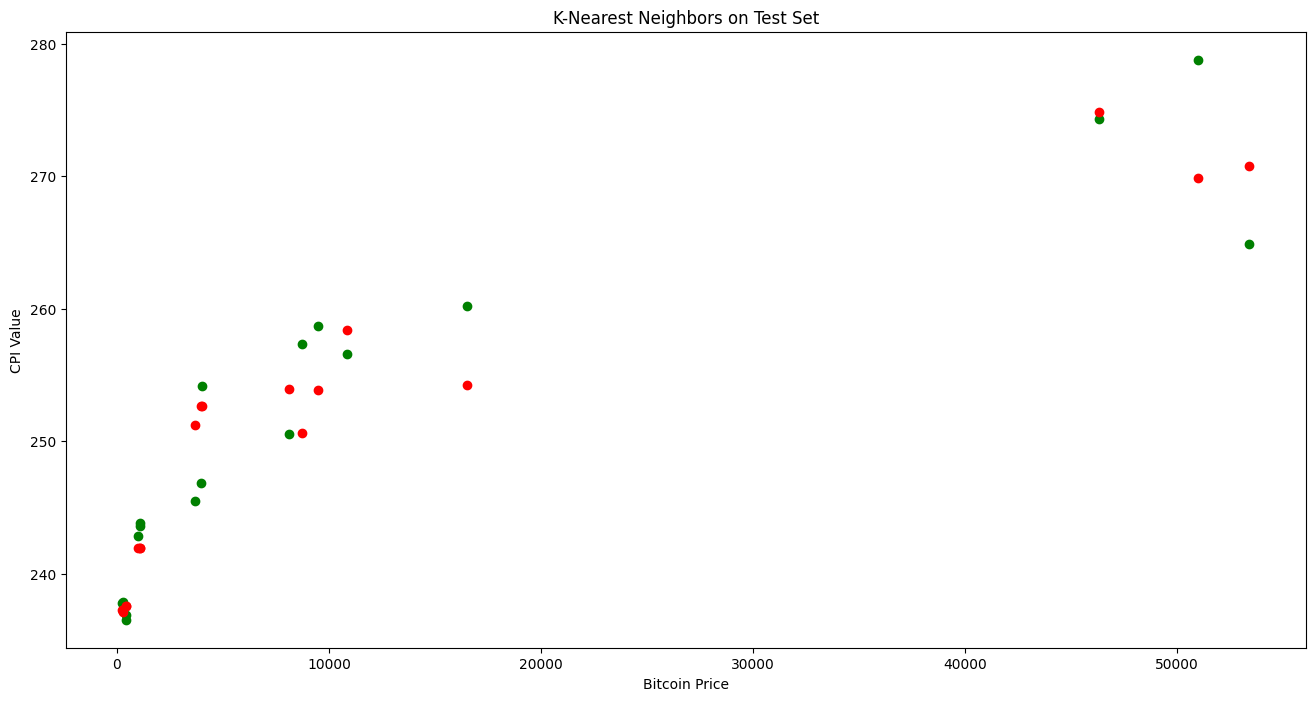

Coefficient of Determination on train set:  0.919
Coefficient of Determination on test set:  0.885


In [11]:
# Generate KNN model
bitcoin_score = knn_algorithm(bitcoin_data_clean, cpi_data_clean, 5, "Bitcoin Price")

### KNN Model on CO2 levels data

In [12]:
# Import predictor dataset
co2_data_clean = pd.read_csv('cleaned_co2.csv')

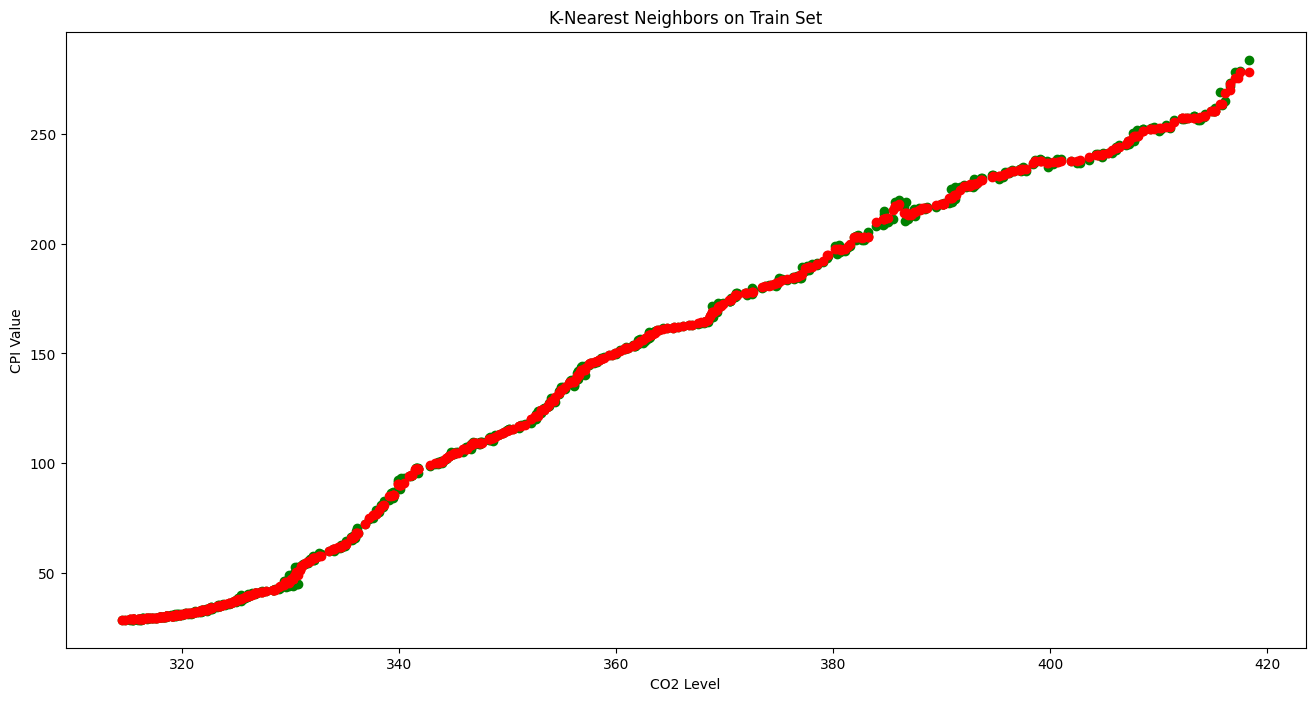

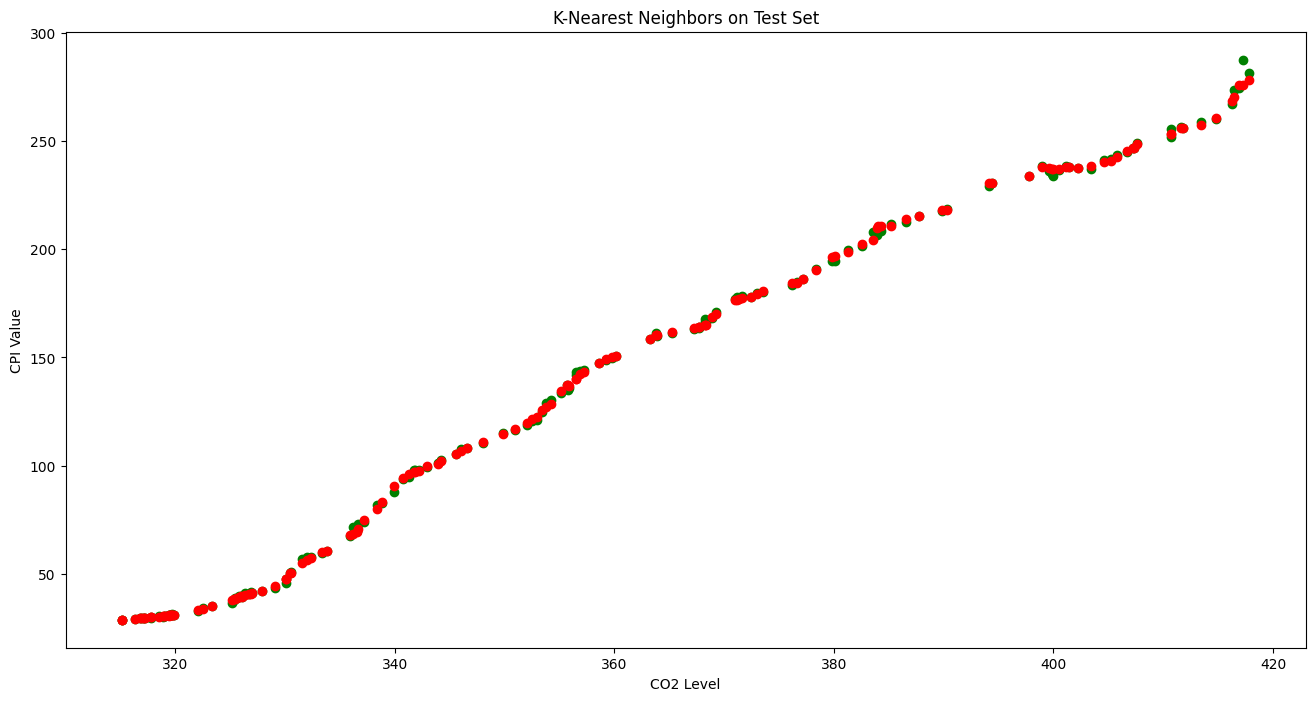

Coefficient of Determination on train set:  1.0
Coefficient of Determination on test set:  1.0


In [13]:
# Generate KNN model
co2_score = knn_algorithm(co2_data_clean, cpi_data_clean, 5, "CO2 Level")

### KNN Model on Nominal Effective Exchange Rate (NEER) data

In [14]:
# Import predictor dataset
neer_data_clean = pd.read_csv('cleaned_neer.csv')

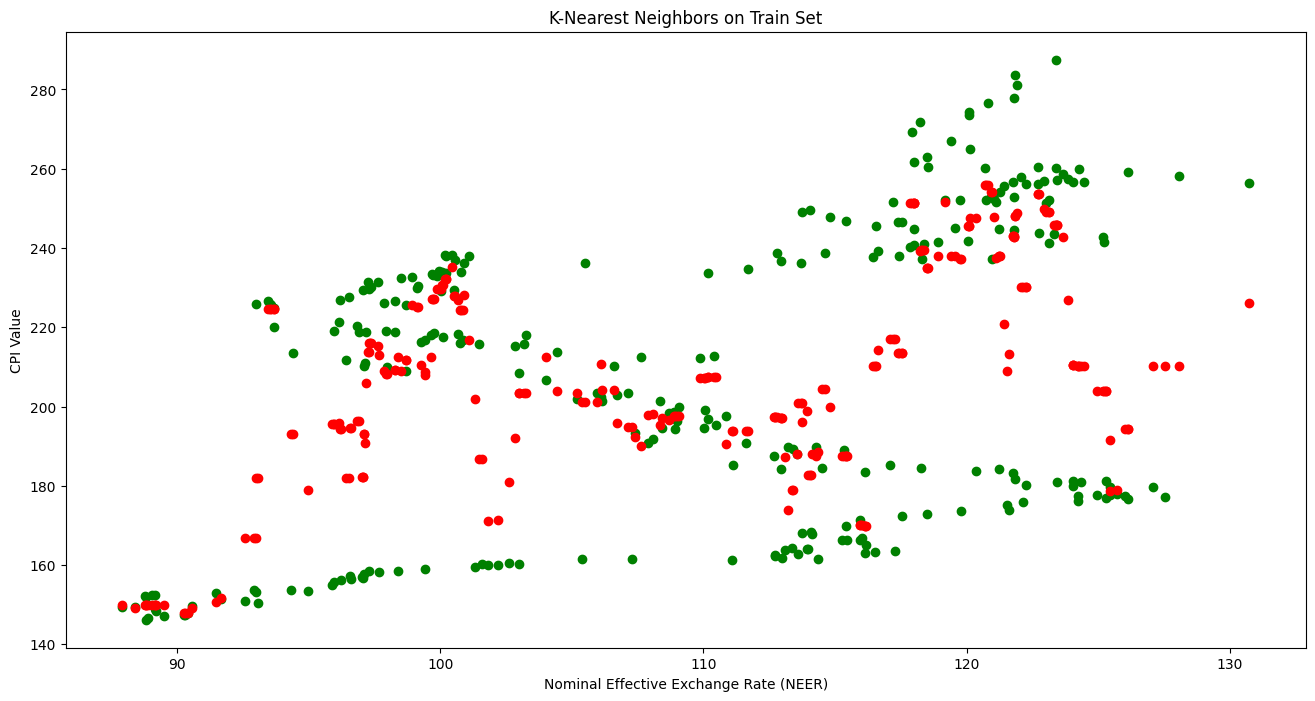

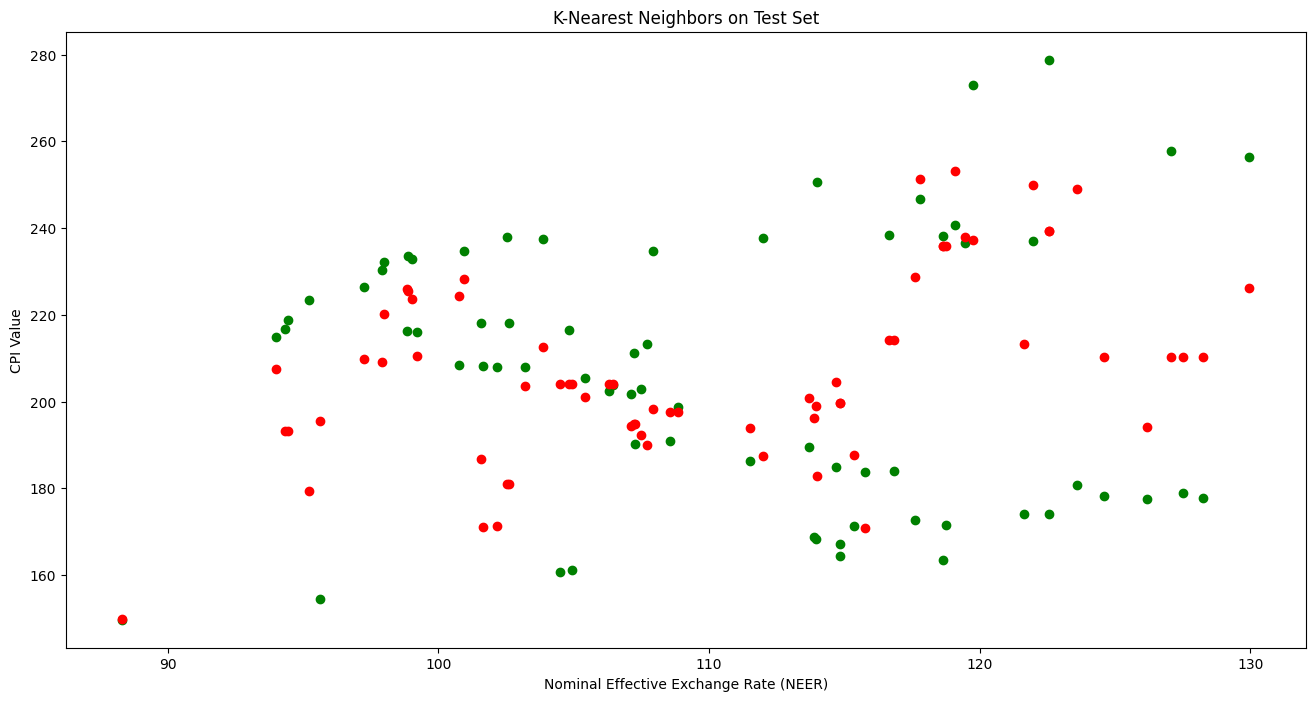

Coefficient of Determination on train set:  0.512
Coefficient of Determination on test set:  -0.083


In [15]:
# Generate KNN model
neer_score = knn_algorithm(neer_data_clean,cpi_data_clean,5,"Nominal Effective Exchange Rate (NEER)")

### KNN Model on oil price data

In [16]:
# Import predictor dataset
oil_data_clean = pd.read_csv('cleaned_oil.csv')

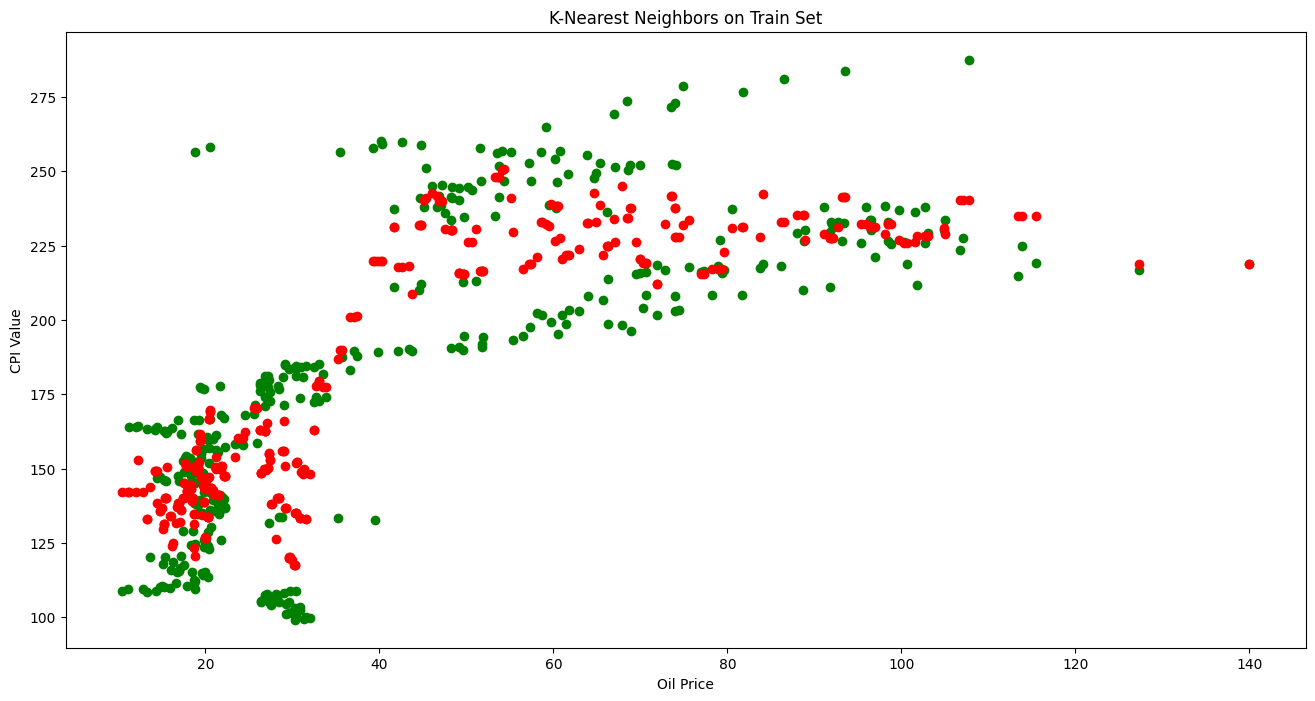

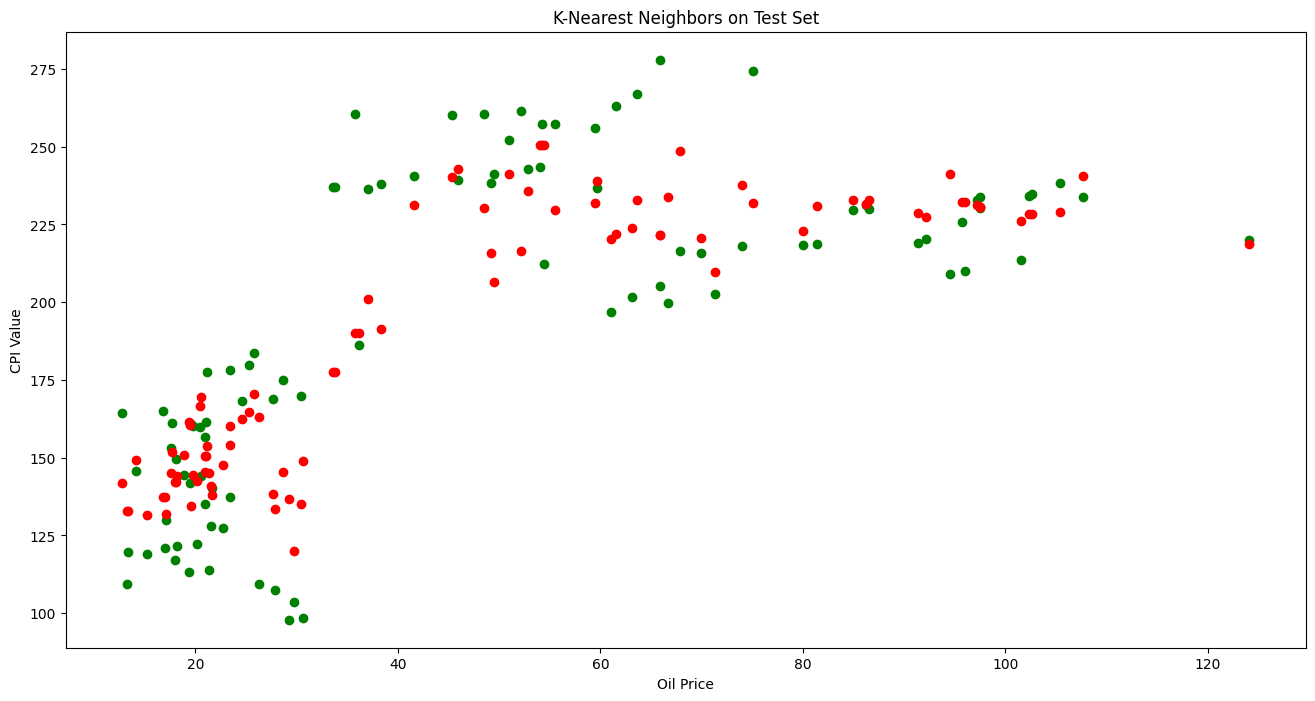

Coefficient of Determination on train set:  0.754
Coefficient of Determination on test set:  0.749


In [17]:
# Generate KNN model
oil_score = knn_algorithm(oil_data_clean, cpi_data_clean, 5, "Oil Price")

### KNN Model on Producer Price Index (PPI) data

In [18]:
# Import predictor dataset
ppi_data_clean = pd.read_csv('cleaned_ppi.csv')

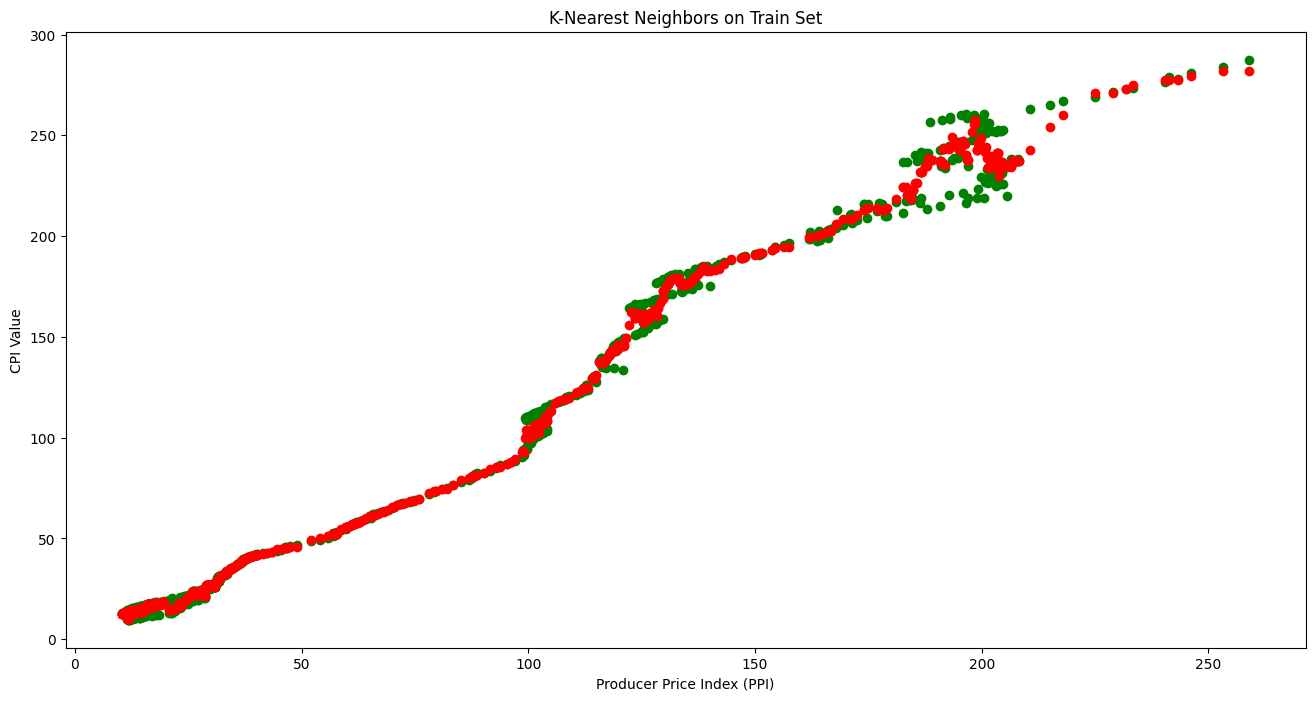

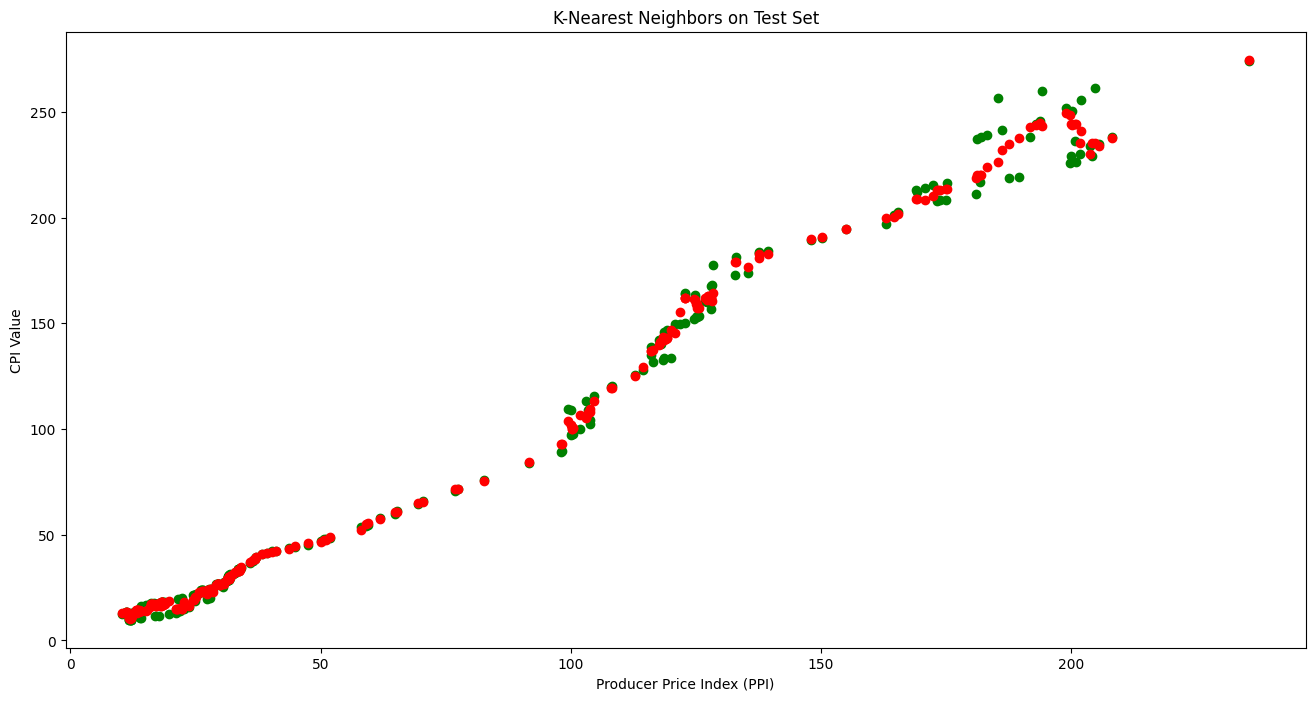

Coefficient of Determination on train set:  0.997
Coefficient of Determination on test set:  0.996


In [19]:
# Generate KNN model
ppi_score = knn_algorithm(ppi_data_clean, cpi_data_clean, 5, "Producer Price Index (PPI)")

### KNN Model on lagged CPI data

In [20]:
# Import predictor dataset
lcpi_data_clean = pd.read_csv('cleaned_lagged_cpi.csv')

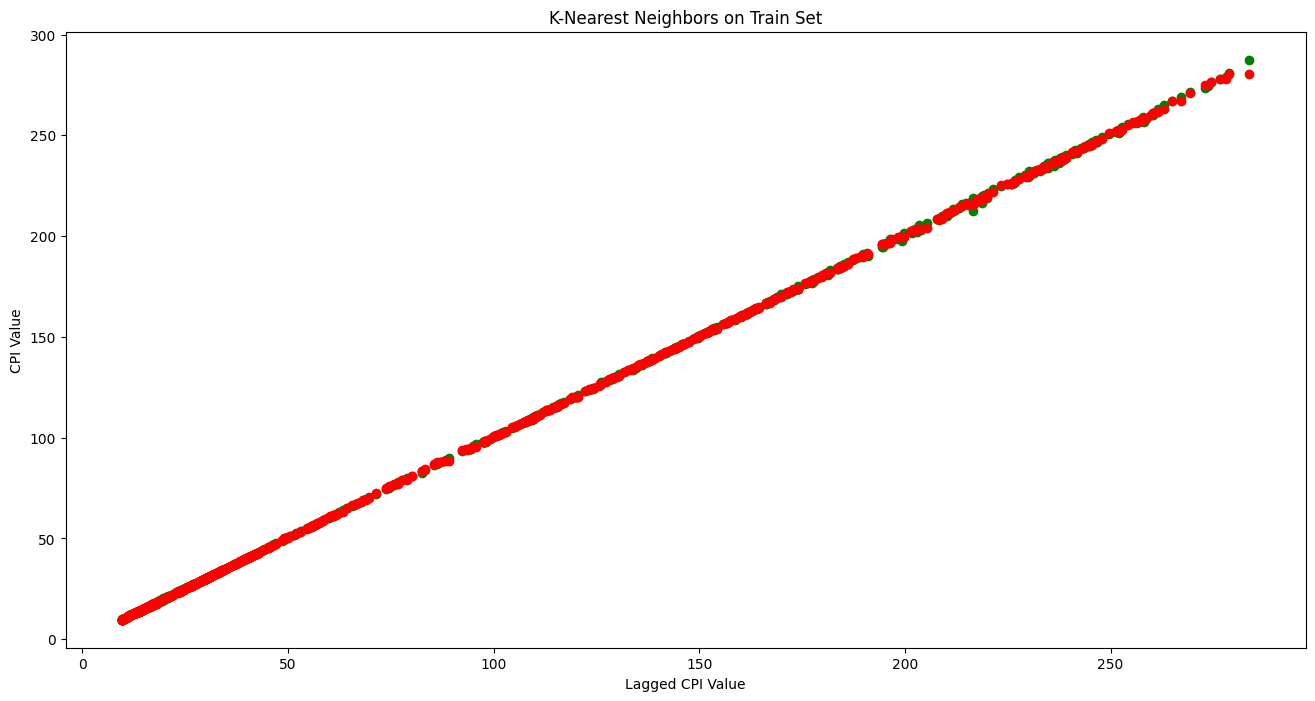

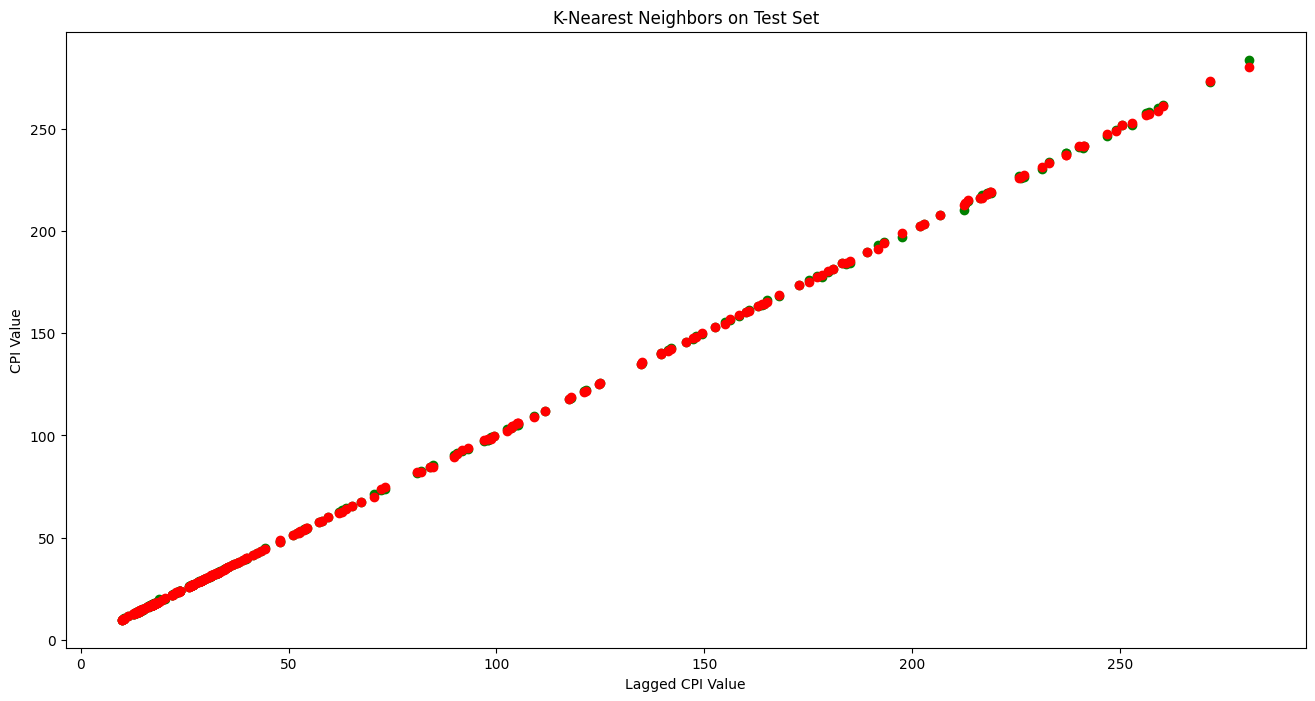

Coefficient of Determination on train set:  1.0
Coefficient of Determination on test set:  1.0


In [21]:
# Generate KNN model
lcpi_score = knn_algorithm(lcpi_data_clean, cpi_data_clean, 5, "Lagged CPI Value")

### KNN Model on S&P 500 price data

In [22]:
# Import predictor dataset
sp_data_clean = pd.read_csv('cleaned_sp.csv')

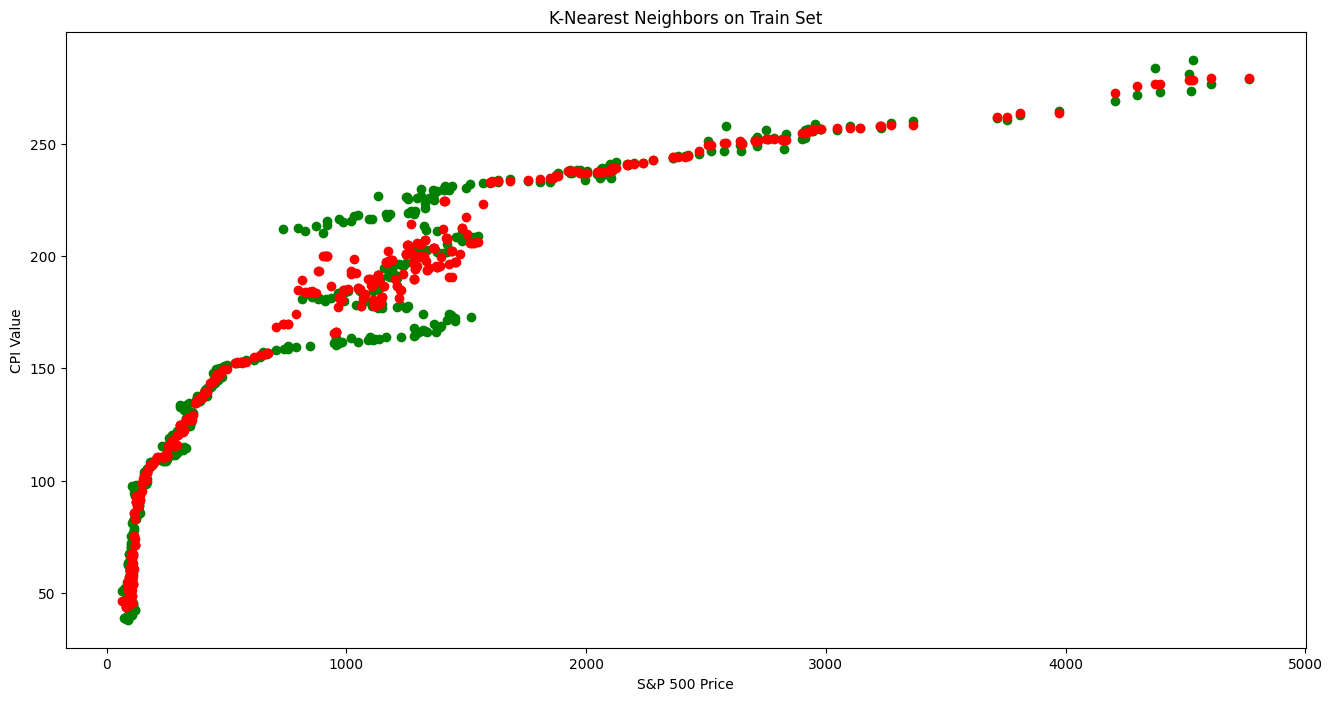

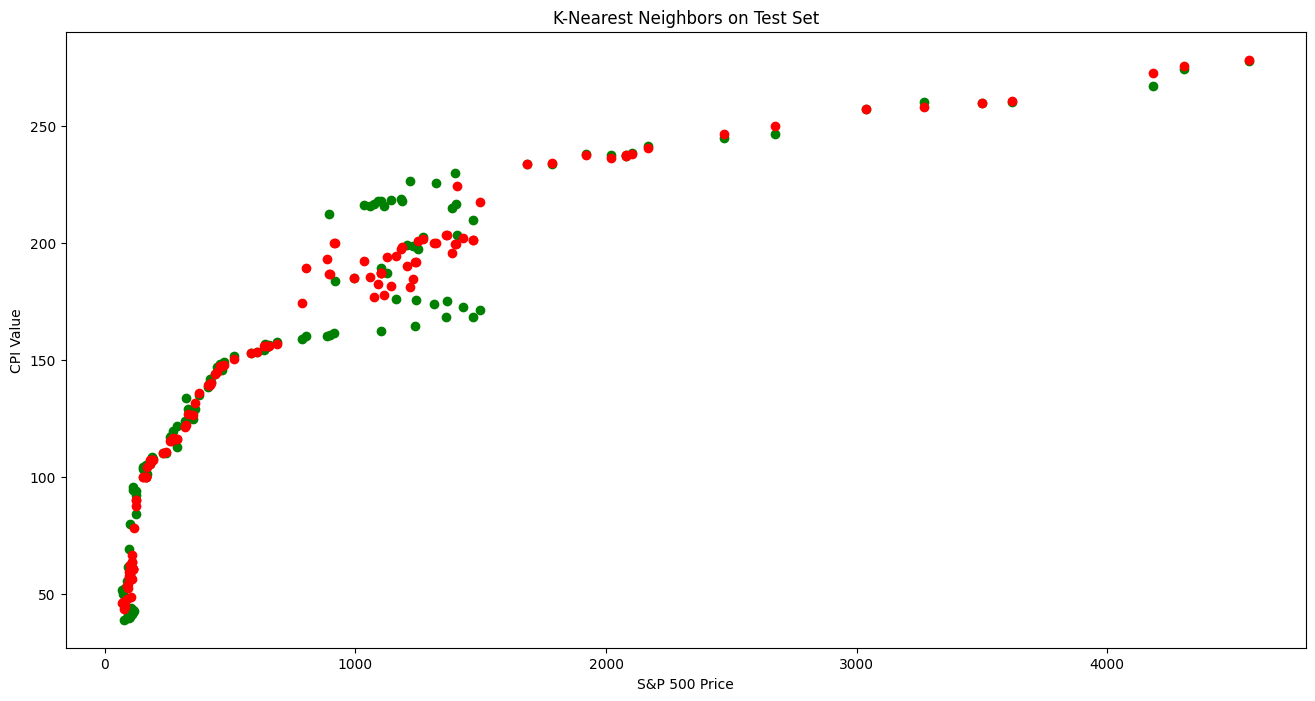

Coefficient of Determination on train set:  0.969
Coefficient of Determination on test set:  0.934


In [23]:
# Generate KNN model
sp_score = knn_algorithm(sp_data_clean, cpi_data_clean, 5, "S&P 500 Price")

#### Coefficient of Determination

In [24]:
print("Coefficient of Determination on Test Data:")
print()
print("Inflation Expectations: ", bie_score)
print("US Unemployment Rate: ", unemp_score)
print("Bitcoin Price: ", bitcoin_score)
print("CO2 Levels: ", co2_score)
print("Nominal Effective Exchange Rate: ", neer_score)
print("Oil Price: ", oil_score)
print("Producer Price Index (PPI): ", ppi_score)
print("Lagged CPI: ", lcpi_score)
print("S&P 500: ", sp_score)

Coefficient of Determination on Test Data:

Inflation Expectations:  0.101
US Unemployment Rate:  -0.229
Bitcoin Price:  0.885
CO2 Levels:  1.0
Nominal Effective Exchange Rate:  -0.083
Oil Price:  0.749
Producer Price Index (PPI):  0.996
Lagged CPI:  1.0
S&P 500:  0.934


From the above results, we can conclude that factors such as CO2 levels, Lagged CPI, PPI, S&P 500, and Bitcoin price have a relatively high accuracy in predicting CPI values.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=568b55e8-02e3-4ff2-aba8-e5ffce14598f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>